In [16]:
import matplotlib
matplotlib.use('Agg')
import datetime
import os
import sys
import json
import glob
import yaml
import math
import numpy as np
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
# params = {
#  'font.size': 20,
#  'font.family': 'Roboto',
#  'legend.fontsize': 20,
#  'xtick.labelsize': 24,
#  'ytick.labelsize': 24,
#  'axes.labelsize': 30,
#  'axes.titlesize': 30,
#  'text.usetex': False,
#  'figure.figsize': [12, 12]
# }
# matplotlib.rcParams.update(params)
import seaborn as sns
import pandas as pd
import ase
from ase.io.trajectory import Trajectory
import pickle
import matplotlib.ticker as ticker

from psiturk_dataset.utils.utils import prep_plt

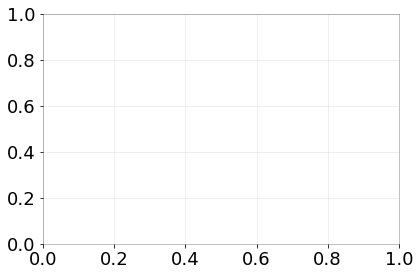

In [17]:

# prep_plt()

# SMALL_SIZE = 20
# MEDIUM_SIZE = 24
# LARGE_SIZE = 20
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=2)    # legend fontsize
# #plt.style.use('seaborn-muted')
# # plt.figure(figsize=(8,7))
# # prep_plt()

# plt.gca().xaxis.label.set_color((0.1, 0.1, 0.1, .85))
# plt.gca().yaxis.label.set_color((0.1, 0.1, 0.1, .85))


prep_plt()
# plt.style.use('seaborn-muted')
# plt.figure(figsize=(8,7))
# prep_plt()

plt.gca().xaxis.label.set_color((0.1, 0.1, 0.1, .85))
plt.gca().yaxis.label.set_color((0.1, 0.1, 0.1, .85))
plt.rc('axes', labelsize=36)
plt.rc('legend', fontsize=24)

In [18]:
def read_json(path):
    f = open(path)
    return json.loads(f.read())

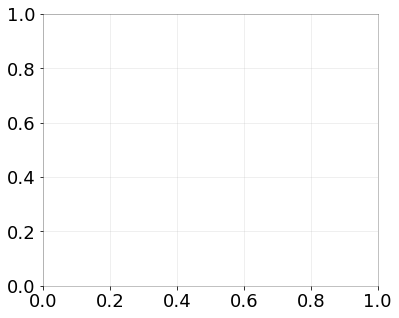

<Figure size 432x288 with 0 Axes>

In [19]:

fig, axs = plt.subplots(1, 1, figsize=(6, 5))
fig_dims = (12, 12)

prep_plt(ax=axs)

In [20]:
def plot_histogram(dataset, key, path, legend, y_label, x_label, ax, xlim, x_interval, y_interval, title, bins):
    print(len(dataset[key]))
    ax = sns.distplot(dataset[key], bins=bins, kde=False, hist=True, ax=ax, kde_kws={"bw_adjust": 1, "linewidth":4}, hist_kws={"alpha": 0.6}, label=legend)
    # g = sns.histplot(dataset[key], binwidth=50, kde=False, ax=ax, alpha= 0.6, label=legend)
    ax.set_xlim(0, xlim)

    ax.set_title(title)
    ax.set_xlabel(x_label, labelpad=10, fontsize=22)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(x_interval))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(y_interval))
    
#     for _,s in ax.spines.items():
#         s.set_color('black')
#         s.set_alpha(0.8)
#         s.set_linewidth(1)

    #sns.despine(ax=ax)

#     ax.spines['bottom'].set_color('0.1')
#     ax.spines['top'].set_color('0.1')
#     ax.spines['right'].set_color('0.1')
#     ax.spines['left'].set_color('0.1')

#     ax.spines['bottom'].set_color('0.0')
#     ax.spines['top'].set_color('0.0')
#     ax.spines['right'].set_color('0.0')
#     ax.spines['left'].set_color('0.0')
#     ax.spines['left'].set_linewidth(3)
#     ax.spines['right'].set_linewidth(3)
#     ax.spines['top'].set_linewidth(3)
#     ax.spines['bottom'].set_linewidth(3)
    
    ax.legend(markerfirst=False, ncol=1, frameon=False, labelspacing=0.4)

In [21]:
paths = [ "objectnav_40k_full.json", "objectnav_s_path_full.json",]

#paths = ["objectnav_s_path_full.json"]
title = ["Human", "Shortest path"]
bins = [120, 30]

#prep_plt(ax=axs)


for i, path in enumerate(paths):
    output_path = "figures/{}_episode_length_distrib.jpg".format(path.split(".")[0])
    file_path = "../data/stats/objectnav/dataset/{}".format(path)
    dataset = read_json(file_path)
    print(len(dataset['episode_length']))
    print(max(dataset["episode_length"]))
    filtered = []
    for f in dataset["episode_length"]:
        if f < 1000:
            filtered.append(f)
    dataset["episode_length"] = filtered
    

    if path == "objectnav_s_path.json":
        dataset["action_frequency"].update({
            "LOOK_UP": 0,
            "LOOK_DOWN": 0
        })

    y_label = ""
    if i == 0:
        y_label = "% Episodes"
    colors = ['#0D95F3', '#FEA23C']
    edge_colors = ['3554D1', '#FD970F']
    

    plot_histogram(
        dataset,
        key="episode_length",
        path=output_path,
        legend=title[i],
        y_label="",
        x_label="Episode length",
        ax=axs,
        xlim=1000,
        x_interval=250,
        y_interval=1500,
        title="ObjectNav",
        bins=bins[i]
    )
# fig.text(0.5, -0.07, 'Episode length', ha='center', fontsize=40)
# fig.suptitle("ObjectNav", x=0.5, y=1.02, ha='center', fontsize=50)
# fig.tight_layout()
fig.savefig("figures/objectnav_episode_length_dist.png", dpi=100, bbox_inches="tight", transparent=False)


40473
7545
39471
114165
220
114165


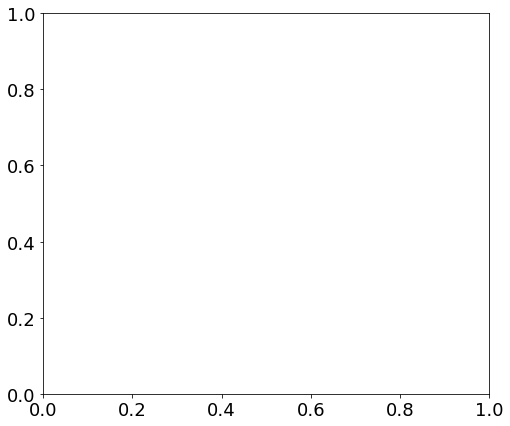

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(8, 7))


In [23]:
paths = ["pick_and_place_full.json", "pick_and_place_s_path_full.json"]
title = ["Human", "Shortest path"]
bins = [90, 46]


prep_plt(ax=axs)

for i, path in enumerate(paths):
    output_path = "figures/{}_episode_length_distrib.jpg".format(path.split(".")[0])
    file_path = "../data/stats/pick_and_place/{}".format(path)
    dataset = read_json(file_path)
    filtered = []
    for f in dataset["episode_length"]:
        if f < 2000:
            filtered.append(f)
    dataset["episode_length"] = filtered
    print(len(dataset["episode_length"]))
    print(max(dataset["episode_length"]))

    if path == "pick_and_place_s_path.json":
        dataset["action_frequency"].update({
            "NO_OP": 0,
            "MOVE_BACKWARD": 0
        })

    y_label = ""
    if i == 0:
        y_label = "# Episodes"
    colors = ['#0D95F3', '#FEA23C']
    edge_colors = ['3554D1', '#FD970F']

    plot_histogram(
        dataset,
        key="episode_length",
        path=output_path,
        legend=title[i],
        y_label="",
        x_label="Episode length",
        ax=axs,
        xlim=2000,
        x_interval=500,
        y_interval=250,
        title="Pick and Place",
        bins=bins[i]
    )

# plt.grid()
# plt.legend()
# plt.show()
# fig.text(0.5, -0.07, 'Episode length', ha='center', fontsize=40)
# fig.suptitle("Pick and Place", x=0.5, y=1.02, ha='center', fontsize=50)
# fig.tight_layout()
fig.savefig("figures/pick_and_place_episode_length_dist.png", dpi=100, bbox_inches="tight", pad_inches=0.1, transparent=False)

11950
1999
11950
25747
732
25747


<Figure size 432x288 with 0 Axes>

## Action frequency

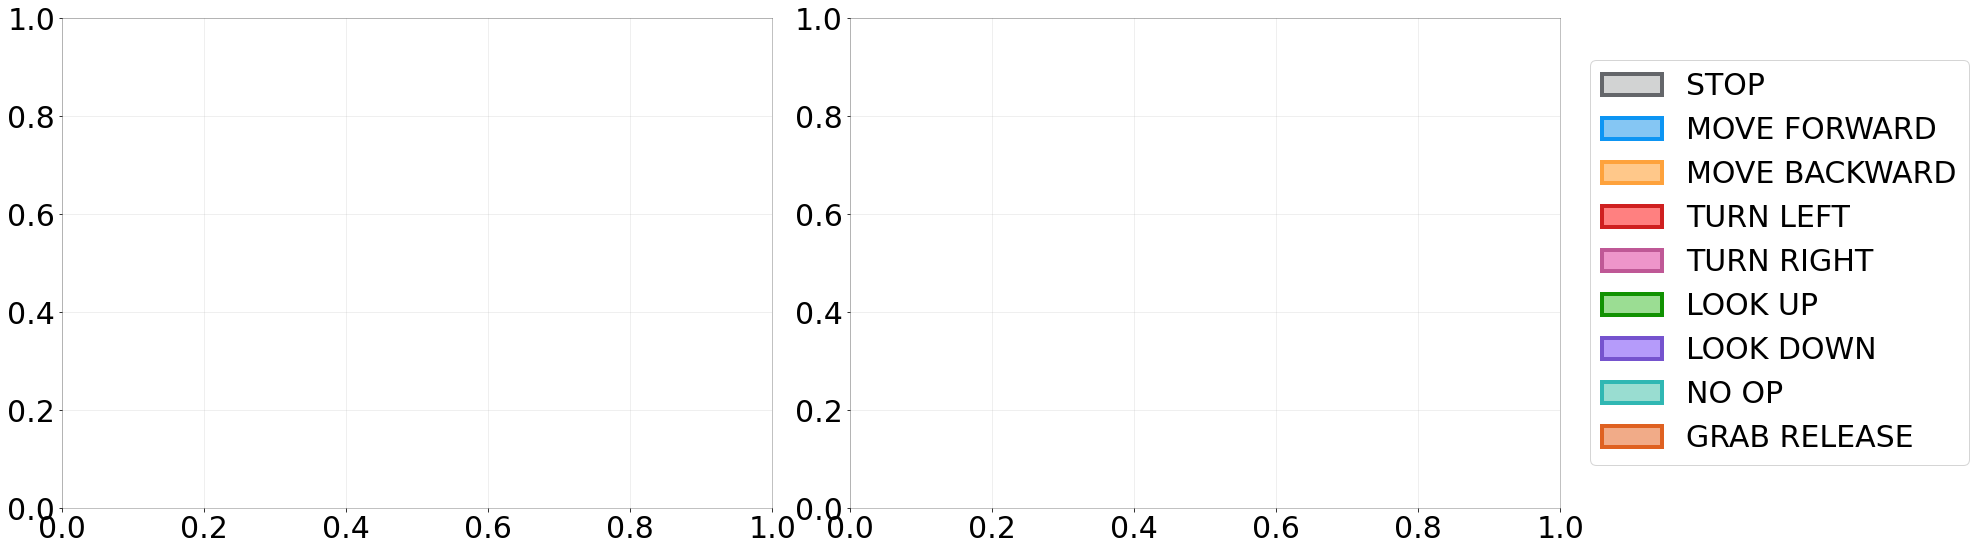

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(28, 8))


fig_dims = (12, 12)
colors = {
    "STOP": "#D2D3D3",
    "MOVE_FORWARD": "#85C6F3",
    "MOVE_BACKWARD": "#FFC88A",
    "TURN_LEFT": "#FF8080",
    "TURN_RIGHT": "#EE95CA",
    "LOOK_UP": "#9BDD93",
    "LOOK_DOWN": "#B59BFA",
    "GRAB_RELEASE": "#F1AB88",
    "NO_OP": "#99DDD1"
}

edge_colors = {
    "STOP": "#64666A",
    "MOVE_FORWARD": "#0D95F3",
    "MOVE_BACKWARD": "#FEA23C",
    "TURN_LEFT": "#CF2020",
    "TURN_RIGHT": "#BF5896",
    "LOOK_UP": "#119202",
    "LOOK_DOWN": "#7553CE",
    "GRAB_RELEASE": "#DF6121",
    "NO_OP": "#30B7B3"
}


prep_plt(ax=axs[0])
prep_plt(ax=axs[1])
# prep_plt(ax=axs[1][0])
# prep_plt(ax=axs[1][1])


actions = ["STOP", "MOVE_FORWARD", "MOVE_BACKWARD", "TURN_LEFT", "TURN_RIGHT", "LOOK_UP", "LOOK_DOWN", "NO_OP", "GRAB_RELEASE"]
#actions = ["STOP", "MOVE_FORWARD","TURN_LEFT", "TURN_RIGHT", "LOOK_UP", "LOOK_DOWN"]
handles = [plt.Rectangle((0,0),2,2, facecolor=colors[label], edgecolor=edge_colors[label], linewidth=4) for label in actions]
fig.legend(handles, [" ".join(action.split("_")) for action in actions], loc="upper right", bbox_to_anchor=(0.99,0.90))
fig.tight_layout()
fig.subplots_adjust(right=0.78) 

#print(len(axs[0]))

In [23]:
def plot_barplot(dataset, key, path, title, y_label, x_label, ax, ylim, interval, div_ticks, suffix, onav_actions, idx, x_div_ticks, x_suffix, is_pick_place=False):
    # onav_actions = ["STOP", "MOVE_FORWARD", "TURN_LEFT", "TURN_RIGHT", "LOOK_UP", "LOOK_DOWN"]
    frequency = [] 
    for ac in onav_actions:
        frequency.append(int(dataset[key][ac]))

    
    plot = sns.barplot(x=onav_actions, y=frequency, ax=ax)

    for i, bar in enumerate(plot.patches):
        print(i, onav_actions)
        if i >= len(onav_actions):
            continue
        bar.set_color(colors[onav_actions[i]])
        clr = bar.get_facecolor()
        bar.set_linewidth(6.0)
        bar.set_edgecolor(edge_colors[onav_actions[i]])
    
    for i, value in enumerate(frequency):
        val_str = "{}{}".format(str(round(value / x_div_ticks, 2)), x_suffix)
        if div_ticks == 1000:
            value = value + 25000
            i = i - 0.3
        else:
            if is_pick_place:
                value = value + 150000
                i = i - 0.45
            else:
                value = value + 200000
                i = i - 0.35
        plot.text(i, value, str(val_str), fontsize=24)
    
    plot.set_xticklabels(["" for i in range(len(onav_actions))])
    plot.yaxis.set_major_locator(ticker.MultipleLocator(interval))
    plot.set_ylim(0, ylim)
    
    y_ticks = plot.get_yticks()    
    if idx is not None:
        y_tick_labels = []
        for y_tick in y_ticks:
            print(y_tick, y_tick // div_ticks, "{}{}".format(int(y_tick // div_ticks), suffix))
            y_tick = "{}{}".format(int(y_tick // div_ticks), suffix)
            y_tick_labels.append(y_tick)
        plot.set_yticklabels(y_tick_labels) #, fontsize=40)
    else:
        plot.set_yticklabels(["" for y in y_ticks])
    
#     ax.grid(alpha=0.25)
#     ax.spines['bottom'].set_color('0.1')
#     ax.spines['top'].set_color('0.1')
#     ax.spines['right'].set_color('0.1')
#     ax.spines['left'].set_color('0.1')
#     ax.spines['left'].set_linewidth(3)
#     ax.spines['right'].set_linewidth(3)
#     ax.spines['top'].set_linewidth(3)
#     ax.spines['bottom'].set_linewidth(3)
    # sns.despine(ax=ax)

    ax.spines['bottom'].set_color('0.0')
    ax.spines['top'].set_color('0.0')
    ax.spines['right'].set_color('0.0')
    ax.spines['left'].set_color('0.0')
    ax.spines['left'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    
    
    plot.set_xlabel(title) #, fontsize=55)
    labelpad = 15
    if "Pick" in y_label:
        labelpad = 15
    plot.set_ylabel(y_label, labelpad = labelpad)


In [20]:
paths = ["objectnav_40k_full.json", "objectnav_s_path_full.json"]
title = ["Human", "Shortest path"]

for i, path in enumerate(paths):
    onav_actions = ["STOP", "MOVE_FORWARD", "TURN_LEFT", "TURN_RIGHT", "LOOK_UP", "LOOK_DOWN"]
    output_path = "figures/{}_episode_length_distrib.jpg".format(path.split(".")[0])
    file_path = "../data/stats/objectnav/dataset/{}".format(path)
    dataset = read_json(file_path)

    if path == "objectnav_s_path_full.json":
        dataset["action_frequency"].update({
            "LOOK_UP": 0,
            "LOOK_DOWN": 0
        })
    dataset["action_frequency"]["STOP"] = dataset["action_frequency"]["STOP"] / 2
    print("split: {}".format(path))
    print(dataset["action_frequency"])

    y_label = ""
    if i == 0:
        y_label = "# Episodes"

    output_path = "figures/{}_action_distrib.jpg".format(path.split(".")[0])
    print(dataset["action_frequency"].keys())
    y_label = ""
    if i == 0:
        y_label = "ObjectNav\n# Actions"
    div_ticks = 1000000
    idx = 0
    if i==1:
        idx = None
    plot_barplot(
        dataset,
        key="action_frequency",
        path=output_path,
        title="",
        x_label="",
        y_label=y_label,
        ax=axs[i],
        ylim=7800000,
        interval=2000000,
        div_ticks=div_ticks,
        suffix="M",
        onav_actions=onav_actions,
        idx=idx,
        x_div_ticks=1000000,
        x_suffix="M"
    )

plt.show()
# fig.savefig("figures/objectnav_action_histogram.png", dpi=200, bbox_inches="tight", pad_inches=0.1, transparent=False)
fig.savefig("figures/objectnav_action_histogram.png", dpi=100, bbox_inches="tight", pad_inches=0.1, transparent=False)

split: objectnav_40k_full.json
{'STOP': 40473.0, 'TURN_RIGHT': 1767251, 'MOVE_FORWARD': 6964886, 'TURN_LEFT': 1715747, 'LOOK_UP': 37430, 'LOOK_DOWN': 47683}
dict_keys(['STOP', 'TURN_RIGHT', 'MOVE_FORWARD', 'TURN_LEFT', 'LOOK_UP', 'LOOK_DOWN'])
0 ['STOP', 'MOVE_FORWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN']
1 ['STOP', 'MOVE_FORWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN']
2 ['STOP', 'MOVE_FORWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN']
3 ['STOP', 'MOVE_FORWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN']
4 ['STOP', 'MOVE_FORWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN']
5 ['STOP', 'MOVE_FORWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN']
-2000000.0 -2.0 -2M
0.0 0.0 0M
2000000.0 2.0 2M
4000000.0 4.0 4M
6000000.0 6.0 6M
8000000.0 8.0 8M
split: objectnav_s_path_full.json
{'STOP': 114165.0, 'TURN_LEFT': 1284542, 'MOVE_FORWARD': 4872944, 'TURN_RIGHT': 1224652, 'LOOK_UP': 0, 'LOOK_DOWN': 0}
dict_keys(['STOP', 'TURN_LEFT', 'MOV

/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


In [24]:
paths = ["pick_and_place_full.json", "pick_and_place_s_path_full.json"]
title = ["Human", "Shortest path"]

for i, path in enumerate(paths):
    task_actions = ["STOP", "MOVE_FORWARD", "MOVE_BACKWARD", "TURN_LEFT", "TURN_RIGHT", "LOOK_UP", "LOOK_DOWN", "NO_OP", "GRAB_RELEASE"]
    output_path = "figures/{}_episode_length_distrib.jpg".format(path.split(".")[0])
    file_path = "../data/stats/pick_and_place/{}".format(path)
    dataset = read_json(file_path)

    if path == "pick_and_place_s_path_full.json":
        dataset["action_frequency"].update({
            "NO_OP": 0,
            "MOVE_BACKWARD": 0
        })
    dataset["action_frequency"]["STOP"] = dataset["action_frequency"]["STOP"] / 2

    print(dataset["action_frequency"])

    y_label = "Pick and Place\n# Actions"
    if i > 0:
        y_label = ""

    output_path = "figures/{}_action_distrib.jpg".format(path.split(".")[0])
    print(dataset["action_frequency"].keys())
    # y_label = ""
    div_ticks = 1000000
    idx = 0
    if i==1:
        idx = None
    plot_barplot(
        dataset,
        key="action_frequency",
        path=output_path,
        title=title[i],
        x_label="",
        y_label=y_label,
        ax=axs[i],
        ylim=5000000,
        interval=1000000,
        div_ticks=div_ticks,
        suffix="M",
        onav_actions=task_actions,
        idx=idx,
        x_div_ticks=1000000,
        x_suffix="M",
        is_pick_place=True
    )

plt.show()
fig.savefig("figures/objectnav_action_histogram.png", dpi=100, bbox_inches="tight", pad_inches=0.1, transparent=False)

{'STOP': 11955.0, 'NO_OP': 1625984, 'LOOK_DOWN': 299585, 'TURN_RIGHT': 2165011, 'TURN_LEFT': 2287572, 'MOVE_FORWARD': 4206341, 'MOVE_BACKWARD': 372347, 'GRAB_RELEASE': 29123, 'LOOK_UP': 142735}
dict_keys(['STOP', 'NO_OP', 'LOOK_DOWN', 'TURN_RIGHT', 'TURN_LEFT', 'MOVE_FORWARD', 'MOVE_BACKWARD', 'GRAB_RELEASE', 'LOOK_UP'])
0 ['STOP', 'MOVE_FORWARD', 'MOVE_BACKWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN', 'NO_OP', 'GRAB_RELEASE']
1 ['STOP', 'MOVE_FORWARD', 'MOVE_BACKWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN', 'NO_OP', 'GRAB_RELEASE']
2 ['STOP', 'MOVE_FORWARD', 'MOVE_BACKWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN', 'NO_OP', 'GRAB_RELEASE']
3 ['STOP', 'MOVE_FORWARD', 'MOVE_BACKWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN', 'NO_OP', 'GRAB_RELEASE']
4 ['STOP', 'MOVE_FORWARD', 'MOVE_BACKWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_UP', 'LOOK_DOWN', 'NO_OP', 'GRAB_RELEASE']
5 ['STOP', 'MOVE_FORWARD', 'MOVE_BACKWARD', 'TURN_LEFT', 'TURN_RIGHT', 'LOOK_

/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/rramrakhya/research/anaconda3/envs/habitat/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


## Success plots

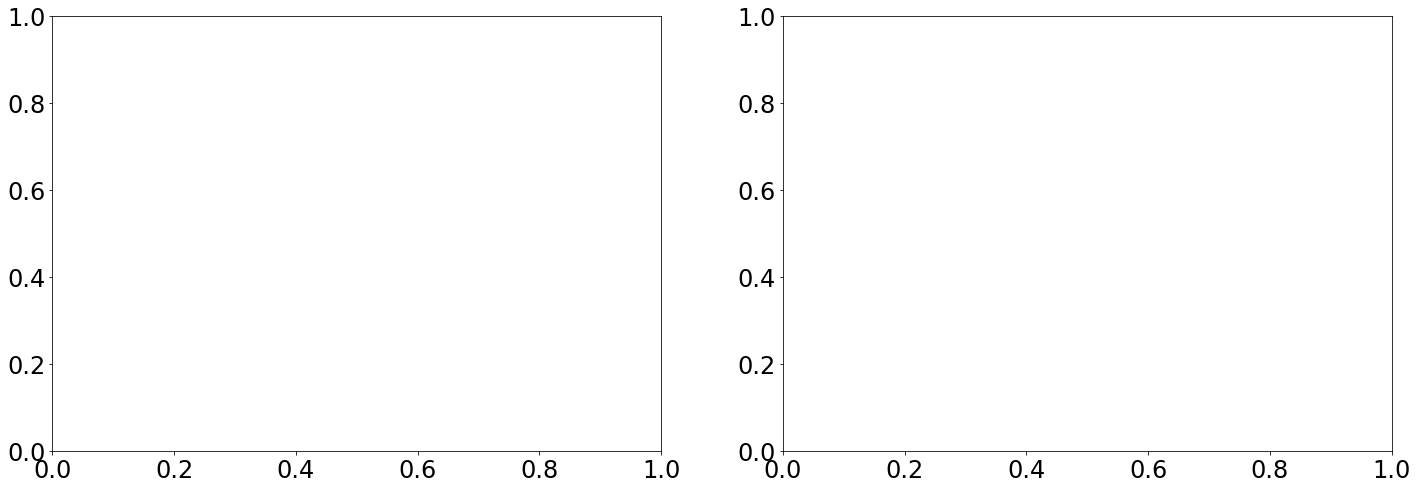

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

fig_dims = (12, 12)

In [4]:
dataset = read_json("../data/stats/pick_and_place_dataset_size_perf.json")

In [5]:
def plot_lineplot(dataset, x, y,legend, y_label, x_label, ax, ylim, title, dashes=False, multiple=2500):
    sns.lineplot(dataset[x], dataset[y], dashes=True, markers=True, marker='o',label=legend, ax=ax)
    ax.set_ylim(0, ylim)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(multiple))
    ax.grid(alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    ax.spines['bottom'].set_color('0.1')
    ax.spines['top'].set_color('0.1')
    ax.spines['right'].set_color('0.1')
    ax.spines['left'].set_color('0.1')
    ax.legend()

In [120]:
df = pd.DataFrame.from_dict(dataset)

In [121]:
df.head()

,val_success,val_spl,test_success,test_spl,split
0,0.014480,0.003188,0.023830,0.004264,2500
1,0.113288,0.025725,0.102128,0.023089,5000
2,0.193356,0.046900,0.190638,0.045779,9600


/Users/ram.ramrakhya/research/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ram.ramrakhya/research/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ram.ramrakhya/research/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

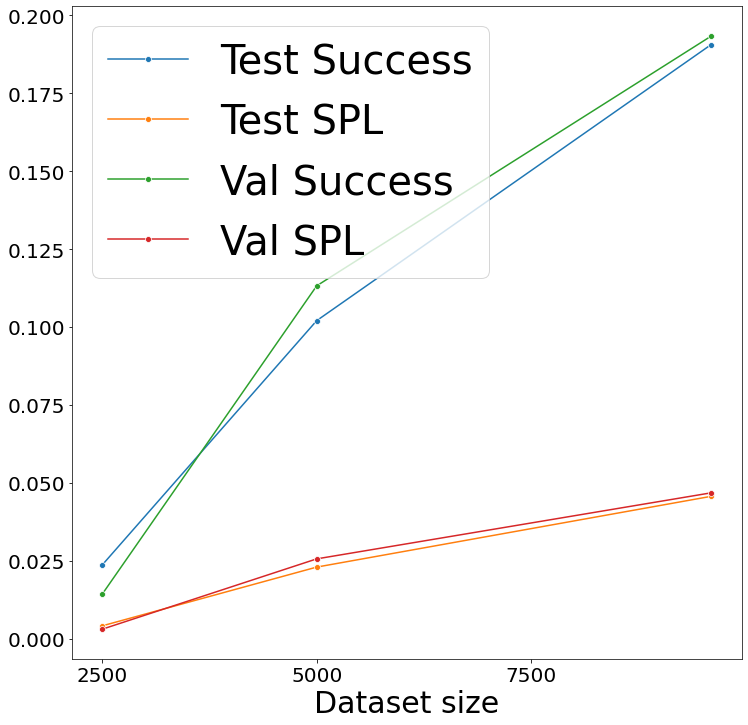

In [122]:
plot_lineplot(df, "split", "test_success", "Test Success", "", "Dataset size", axs[0], 1,"")
plot_lineplot(df, "split", "test_spl", "Test SPL", "", "Dataset size", axs[0], 1,"")

plot_lineplot(df, "split", "val_success", "Val Success", "", "Dataset size", axs[0], 1,"", True)
plot_lineplot(df, "split", "val_spl", "Val SPL", "", "Dataset size", axs[0],1,"", True)

In [127]:
dataset = read_json("../data/stats/pick_and_place_val_train_perf.json")
df = pd.DataFrame.from_dict(dataset)
df.head()

,success,spl,ckpt,train_sucess,train_spl
0,0.000000,0.000000,1,0.000,0.000000
1,0.019583,0.004575,2,0.012,0.002665
2,0.000426,0.000227,3,0.000,0.000000
3,0.029374,0.006832,4,0.026,0.005409
4,0.082163,0.018420,5,0.083,0.018589


In [ ]:
plot_lineplot(df, "split", "test_success", "Test Success", "", "Dataset size", axs[0], 1,"")
plot_lineplot(df, "split", "test_spl", "Test SPL", "", "Dataset size", axs[0], 1,"")

### Success vs steps

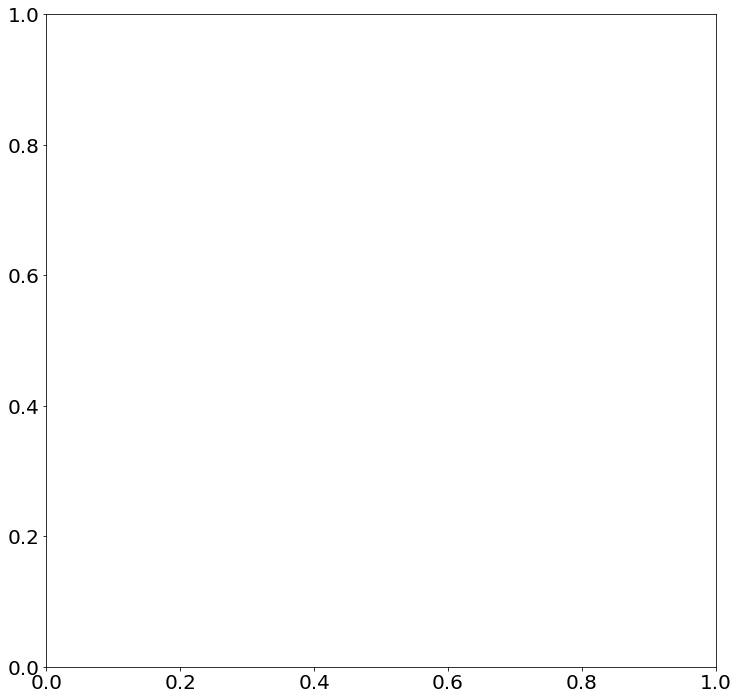

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(12, 12))

fig_dims = (12, 12)

In [14]:
dataset = read_json("../data/stats/objectnav_perf.json")

In [15]:
df = pd.DataFrame.from_dict(dataset)
df[["success", "spl"]] *= 100
df[["ckpt"]] *= 3
df.head()

,success,spl,entropy,ckpt
0,0.000000,0.000000,2.578772,3
1,5.105593,2.600099,2.546248,12
2,6.706893,3.277607,2.549751,15
3,7.472731,4.065340,2.519356,18
4,8.911581,4.741738,2.413580,21


In [16]:
plot_lineplot(
    df, x="ckpt", y="success", legend="Train success", y_label="Percentage",
    x_label="Training Steps (in millions)", ax=axs, ylim=20,title="", multiple=3
)
plot_lineplot(
    df, x="ckpt", y="spl", legend="Train spl", y_label="Percentage",
    x_label="Training Steps (in millions)", ax=axs, ylim=20,title="", multiple=3
)

/Users/ram.ramrakhya/research/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ram.ramrakhya/research/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [17]:
plt.show()
fig.savefig("figures/objectnav_train_perf.png", dpi=200, bbox_inches="tight", pad_inches=0.1, transparent=False)